## Pandas Introduction 


In [1]:
## import the library 
import pandas as pd 

## change the number of columns visible in the notebook 
pd.set_option('max_columns', 50)

In [2]:
## Read the data into pandas with the read_csv method 

fight_songs = pd.read_csv('../data/fight_song.csv')

## Attributes and Methods

Pandas offers a huge number of built in attributes in functions that we will use to "munge" data. You can use tab to pull them up. 

In [3]:
## scroll through some availible attributes
fight_songs.head()

,school,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,number_fights,victory,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id
0,Notre Dame,Independent,Victory March,Michael J. Shea and John F. Shea,1908,No,Yes,No,152,64,Yes,1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,6,15a3ShKX3XWKzq0lSS48yr
1,Baylor,Big 12,Old Fight,Dick Baker and Frank Boggs,1947,Yes,Yes,No,76,99,Yes,4,Yes,Yes,Yes,No,No,Yes,No,No,Yes,5,2ZsaI0Cu4nz8DHfBkPt0Dl
2,Iowa State,Big 12,Iowa State Fights,"Jack Barker, Manly Rice, Paul Gnam, Rosalind K...",1930,Yes,Yes,No,155,55,Yes,5,No,No,No,Yes,No,No,Yes,No,Yes,4,3yyfoOXZQCtR6pfRJqu9pl
3,Kansas,Big 12,I'm a Jayhawk,"George ""Dumpy"" Bowles",1912,Yes,Yes,No,137,62,No,0,No,No,No,No,Yes,No,Yes,Yes,No,3,0JzbjZgcjugS0dmPjF9R89
4,Kansas State,Big 12,Wildcat Victory,Harry E. Erickson,1927,Yes,Yes,No,80,67,Yes,6,Yes,No,Yes,No,No,Yes,No,No,No,3,4xxDK4g1OHhZ44sTFy8Ktm


## Initial exploratory methods 

Note `df` refers to any generic dataframe. It's important to remember some methods work on entire dataframes and others work on series (individuals columns). 

``` python 
## show first rows 
df.head()

## show last rows 
df.tail()

## show general info 
df.info()

## show rows, columns
df.shape

## numerical descriptions (there are many more than these)
df.mean()
df.std()
df.describe()
```


#### What is the mean length of all fight songs? 


In [5]:
fight_songs.mean()

bpm              128.800000
sec_duration      71.907692
number_fights      2.846154
trope_count        3.615385
dtype: float64

In [12]:
fight_songs['sec_duration']

0      64
1      99
2      55
3      62
4      67
     ... 
60    110
61     85
62     42
63     71
64     69
Name: sec_duration, Length: 65, dtype: int64

#### How long is the longest fight song?

In [13]:
fight_songs.describe(percentiles=[.1, .2, .3, .73, .95])

,bpm,sec_duration,number_fights,trope_count
count,65.000000,65.000000,65.000000,65.000000
mean,128.800000,71.907692,2.846154,3.615385
std,33.152677,25.056014,3.231828,1.674182
min,65.000000,27.000000,0.000000,0.000000
10%,75.400000,43.200000,0.000000,1.000000
20%,80.800000,54.800000,0.000000,2.800000
30%,132.200000,60.000000,0.000000,3.000000
50%,140.000000,67.000000,2.000000,4.000000
73%,150.720000,83.720000,4.720000,5.000000
95%,166.800000,111.600000,8.000000,6.000000


In [15]:
fight_songs['sec_duration'].max()

172

In [16]:
fight_songs.dtypes

school             object
conference         object
song_name          object
writers            object
year               object
student_writer     object
official_song      object
contest            object
bpm                 int64
sec_duration        int64
fight              object
number_fights       int64
victory            object
win_won            object
victory_win_won    object
rah                object
nonsense           object
colors             object
men                object
opponents          object
spelling           object
trope_count         int64
spotify_id         object
dtype: object

In [18]:
fight_songs[['sec_duration', 'year']].mean()

sec_duration    71.907692
dtype: float64

## Series

A series is an individual column - it's a different datatype than a dataframe and they have their own attributes and methods 

Access a series using square brackets 

``` python
df['column_name']
```

---
Take a look at this documentation:
[Value Counts ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) 

Note <div style="color:blue"> pandas.Series.value_counts </div>

This means that value_counts is used on a series as opposed to: [Drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)</n>

<div style="color:blue" > pandas.DataFrame.drop </div>

In [19]:
## use value counts on conference 
fight_songs['conference'].value_counts()

Big Ten        14
SEC            14
ACC            14
Pac-12         12
Big 12         10
Independent     1
Name: conference, dtype: int64

In [20]:
## number of unique values 
fight_songs['conference'].unique()

array(['Independent', 'Big 12', 'Big Ten', 'Pac-12', 'SEC', 'ACC'],
      dtype=object)

In [22]:
fight_songs['conference'].value_counts(normalize=True)

Big Ten        0.215385
SEC            0.215385
ACC            0.215385
Pac-12         0.184615
Big 12         0.153846
Independent    0.015385
Name: conference, dtype: float64

In [24]:
fight_songs.shape

(65, 23)

## Pandas Broadcasting 

Applying some change to every single cell in a column 

In [34]:
import numpy as np

In [35]:
def cleaner(cell):
    try:
        return int(cell)
    except:
        return np.NaN



In [36]:
cleaner('unknown')

nan

In [40]:
fight_songs['year'] = fight_songs['year'].map(cleaner)

In [41]:
fight_songs['year'].mean()

1926.75

In [45]:
## We'll create a new column called "years old"

fight_songs['years_old'] = 2019 - fight_songs['year']

In [49]:
fight_songs.head(2)


,school,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,number_fights,victory,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id,years_old
0,Notre Dame,Independent,Victory March,Michael J. Shea and John F. Shea,1908.0,No,Yes,No,152,64,Yes,1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,6,15a3ShKX3XWKzq0lSS48yr,111.0
1,Baylor,Big 12,Old Fight,Dick Baker and Frank Boggs,1947.0,Yes,Yes,No,76,99,Yes,4,Yes,Yes,Yes,No,No,Yes,No,No,Yes,5,2ZsaI0Cu4nz8DHfBkPt0Dl,72.0


In [6]:
## defining a small funtion that we'll apply to every cell in the "year" column


In [55]:
## new column with broadcasting 


## A Taste of what's to come - Boolean Filtering,  Groupby, Map

Don't worry about following along here - I just want to introduce this concept and provide an example 

In [53]:
## boolean filter 
fight_songs['sec_duration'] < 60

0     False
1     False
2      True
3     False
4     False
      ...  
60    False
61    False
62     True
63    False
64    False
Name: sec_duration, Length: 65, dtype: bool

In [55]:
fight_songs[fight_songs['sec_duration'] < 60].head(3)

,school,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,number_fights,victory,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id,years_old
2,Iowa State,Big 12,Iowa State Fights,"Jack Barker, Manly Rice, Paul Gnam, Rosalind K...",1930.0,Yes,Yes,No,155,55,Yes,5,No,No,No,Yes,No,No,Yes,No,Yes,4,3yyfoOXZQCtR6pfRJqu9pl,89.0
5,Oklahoma,Big 12,Boomer Sooner,Arthur M. Alden,1905.0,Yes,Yes,No,153,37,No,0,No,No,No,Yes,No,No,No,No,Yes,2,0QXC8Gg1oKWkORegslTXoT,114.0
6,Oklahoma State,Big 12,Ride 'Em Cowboys,J.K. Long,1934.0,No,Yes,No,180,29,Yes,5,Yes,No,Yes,No,No,No,Yes,Yes,No,4,0mTJqaacUZPG740Y1YDn5j,85.0


In [68]:
fight_songs.head()

,school,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,number_fights,victory,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id,years_old
0,Notre Dame,Independent,Victory March,Michael J. Shea and John F. Shea,1908.0,No,Yes,No,152,64,Yes,1,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,6,15a3ShKX3XWKzq0lSS48yr,111.0
1,Baylor,Big 12,Old Fight,Dick Baker and Frank Boggs,1947.0,Yes,Yes,No,76,99,Yes,4,Yes,Yes,Yes,No,No,Yes,No,No,Yes,5,2ZsaI0Cu4nz8DHfBkPt0Dl,72.0
2,Iowa State,Big 12,Iowa State Fights,"Jack Barker, Manly Rice, Paul Gnam, Rosalind K...",1930.0,Yes,Yes,No,155,55,Yes,5,No,No,No,Yes,No,No,Yes,No,Yes,4,3yyfoOXZQCtR6pfRJqu9pl,89.0
3,Kansas,Big 12,I'm a Jayhawk,"George ""Dumpy"" Bowles",1912.0,Yes,Yes,No,137,62,No,0,No,No,No,No,Yes,No,Yes,Yes,No,3,0JzbjZgcjugS0dmPjF9R89,107.0
4,Kansas State,Big 12,Wildcat Victory,Harry E. Erickson,1927.0,Yes,Yes,No,80,67,Yes,6,Yes,No,Yes,No,No,Yes,No,No,No,3,4xxDK4g1OHhZ44sTFy8Ktm,92.0


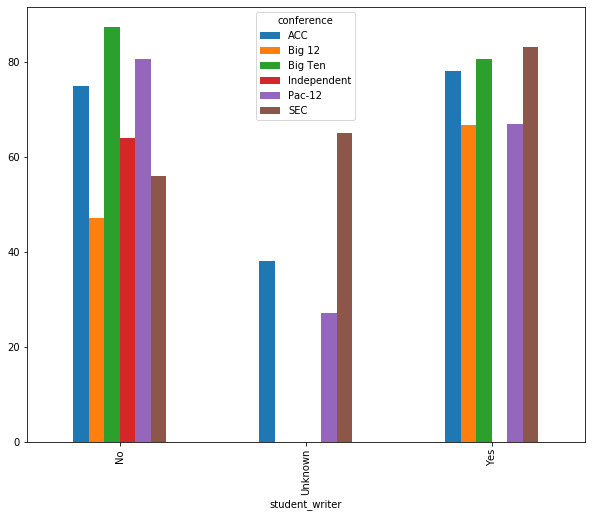

In [77]:
### using groupby 
fight_songs.groupby(['student_writer', 'conference'])['sec_duration'].mean().unstack().plot.bar(figsize=(10,8));

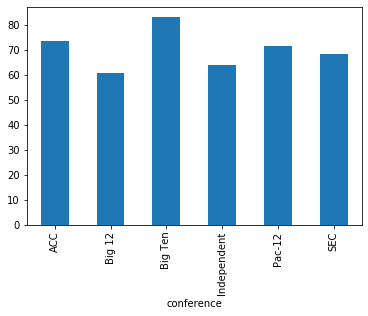

In [67]:
%matplotlib inline
fight_songs.groupby('conference')['sec_duration'].mean().plot.bar(1);

In [86]:
# Change Texas fight song
fight_songs.loc[7, 'song_name'] = 'I love Austin'

In [88]:
fight_songs.loc[5:7]

,school,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,fight,number_fights,victory,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id,years_old
5,Oklahoma,Big 12,Boomer Sooner,Arthur M. Alden,1905.0,Yes,Yes,No,153,37,No,0,No,No,No,Yes,No,No,No,No,Yes,2,0QXC8Gg1oKWkORegslTXoT,114.0
6,Oklahoma State,Big 12,Ride 'Em Cowboys,J.K. Long,1934.0,No,Yes,No,180,29,Yes,5,Yes,No,Yes,No,No,No,Yes,Yes,No,4,0mTJqaacUZPG740Y1YDn5j,85.0
7,Texas,Big 12,I love Austin,"Walter S. Hunnicutt, James E. King and Burnett...",1923.0,No,Yes,No,81,65,Yes,17,No,Yes,Yes,No,No,Yes,No,Yes,No,4,53CytfvDMSkJHY5PtrcZiD,96.0


In [73]:
## the function working on one individual input 


0

In [5]:
## make new column with function 
